<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_AMLlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression**

Each Sample in the dataset describes a house in Boston town. The data was drawn from the Boston
Standard Metropolitan Statistical Area (SMSA) in 1970.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/content/Program_1_Dataset - Program_1_Dataset.csv')
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.shape

(506, 14)

In [5]:
data.isnull()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Considering Avg_room as a predictor and MValue as a target variable



Visualizing the association between the predictor and the target using scatter plot

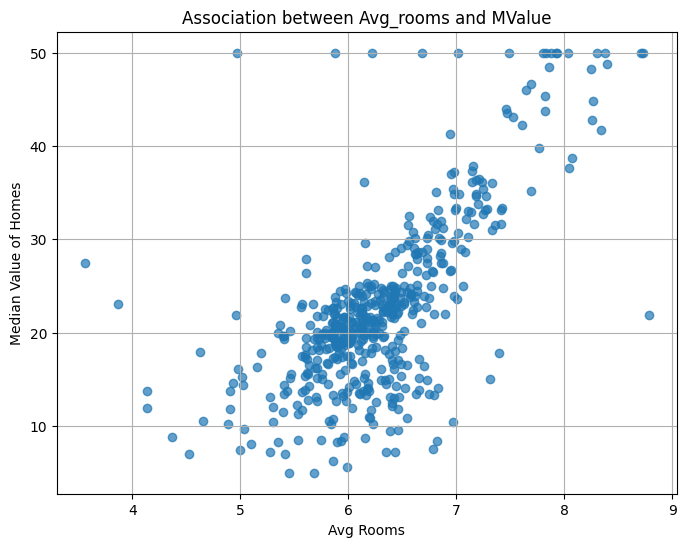

In [7]:
X = data[['Avg_rooms']]
y = data['MValue']

plt.figure(figsize=(8,6))
plt.scatter(X,y,alpha=0.7)
plt.title('Association between Avg_rooms and MValue')
plt.xlabel('Avg Rooms')
plt.ylabel('Median Value of Homes')
plt.grid(True)
plt.show()

**Inference:** This scatter plot provides association between the number of rooms and the value of the house. There is a positive correlation between the two variables. It is used to predict the value of house based on the number of rooms it has. It also used to identify houses that are overpriced or underpriced.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [9]:
print("X_train shape:", X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape: (354, 1)
X_test shape:  (152, 1)
y_train shape:  (354,)
y_test shape:  (152,)


In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)
print("Predicted Values: ", y_pred[:5])

Predicted Values:  [24.84936253 10.28180051 21.9037158  18.97592147 25.62594213]


**Inference:** Each value represents the predicted median value of owner occupied homes(MValue) based on the corresponding average number of rooms per dwelling(Avg_rooms) from the test dataset.

Observing the coefficient and intercept values for the model

In [12]:
coefficients = model.coef_
intercepts = model.intercept_
print("Coefficients: ", coefficients)
print("Intercept: ", intercepts)

Coefficients:  [8.92620222]
Intercept:  -33.510147597513345


**Inference**

The coefficient [8.92620222] signifies the effect of the Avg_rooms variable on the predicted 'MValue'. It implies that on average for each additional room the median value of owner occupied homes ('MValue') is estimated to increase by approximately 8.926 thousand dollars.

The intercept -33.510147597513345 represents the estimated median value of owner occupied homes when the average number of rooms per dwelling is zero.




Evaluating the model using mean squared error values and R-squared values on the training and the testing datasets.

In [13]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train,y_train_pred)
train_r2 = r2_score(y_train,y_train_pred)
print("Training set: ")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

Training set: 
Mean Squared Error: 47.81170547959663
R-squared: 0.46176397399316227


**Inference**

MSE of approximately 47.81 indicates the average squared deviation of the predicted 'MValue' from the actual 'MValue' in the training set.

R squared value approximately 0.4618 indicates that the model explains around 46.18 % of variance from the 'MValue' using the 'Avgrooms' predictor variable on the training set.

In [14]:
test_mse = mean_squared_error(y_test,y_pred)
test_r2 = r2_score(y_test,y_pred)
print("Testing set: ")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

Testing set: 
Mean Squared Error: 33.853804802145724
R-squared: 0.5424461839891813


**Inference**

MSE value of approximately 33.85 represents the average squared difference between the predicted and actual values of 'MValue' in the testing set. Lower values indicate better performance.

R squared value of about 0.5424 indicates that the model explains 54.24% of the variance in the 'MValue' using the 'Avg_rooms' predictor variable on testing data.



**Conclusion**

While comparing the evalution metrics between the training and testing data, the model seems to generalize slightly better to unseen data than it did on training set.

The R squared value and MSE on the testing set are higher and lower, indicating better performance compared to the training set.